In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


In [3]:
crime_rate=pd.read_csv('A:/Data Science/assignments/Clustering/crime_data (1).csv')

In [4]:
crime_rate=crime_rate.rename({'Unnamed: 0':'State'},axis=1)

In [10]:
crime_rate.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
crime_rate1=crime_rate.loc[:,['Murder','Assault','Rape']]

In [14]:
#Min Max Scaling
scal=MinMaxScaler()
scal_data=scal.fit_transform(crime_rate1)
scal_data=pd.DataFrame(scal_data,columns=['Murder','Assault','Rape'])

In [15]:
scal_data.head()

,Murder,Assault,Rape
0,0.746988,0.654110,0.359173
1,0.554217,0.746575,0.961240
2,0.439759,0.852740,0.612403
3,0.481928,0.496575,0.315245
4,0.493976,0.791096,0.860465


In [20]:
k_range=range(2,12)
SSE=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(scal_data)
    SSE.append(km.inertia_)

In [22]:
SSE

[3.7259468220781518,
 2.7433428057294296,
 1.9337657564199096,
 1.687125019168689,
 1.4982326404982693,
 1.3351681773324229,
 1.219005489077785,
 1.0775243902351066,
 0.9168243538819908,
 0.8553656694134156]

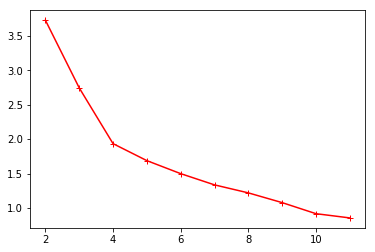

In [25]:
plt.plot(k_range,SSE,color='red',marker='+')

In [26]:
km=KMeans(n_clusters=4)
km.fit(scal_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
km.labels_

array([1, 2, 2, 0, 2, 2, 3, 0, 1, 1, 3, 3, 1, 0, 3, 0, 0, 1, 3, 1, 0, 2,
       3, 1, 0, 0, 3, 2, 3, 0, 2, 1, 1, 3, 0, 0, 0, 0, 3, 1, 3, 1, 1, 0,
       3, 0, 0, 3, 3, 0])

In [28]:
crime_rate['Clusters']=km.labels_

In [29]:
crime_rate.head()

,State,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


In [33]:
def clust1(x):
    if (crime_rate.Clusters == x).any():
        return  crime_rate[crime_rate['Clusters']==x]
    
    else:
         y=0

In [35]:
clust1(1)

,State,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1
23,Mississippi,16.1,259,44,17.1,1
31,New York,11.1,254,86,26.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
